# **Titanic Survival Prediction**

## **Part I: Project Overview**
In 1912 the world-famous ship Titanic crushed a iceberg and then sank. People from different ages, gender and other features died in this disaster. This project aims to predict the suvival of passengers on the Titanic using machine learning models, finding out what features help people survive. It follows the kaggle competition ["Titanic: Machine Learning from Disaster"](https://www.kaggle.com/c/titanic).

### Dataset:

#### Features:
- `PassengerId`: Unique identifier
- `Pclass`: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- `Name`: Passenger name
- `Sex`: Gender
- `Age`: Age in years
- `SibSp`: # of siblings/spouses aboard
- `Parch`: # of parents/children aboard
- `Ticket`: Ticket number
- `Fare`: Passenger fare
- `Cabin`: Cabin number (many missing values)
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

#### Label:
- `Survived` (0 = No, 1 = Yes)

# **Part II: Exploratory Data Analysis(EDA)**
In this notebook, we perform an exploratory data analysis (EDA) of the Titanic Dataset.

The Content of our notebook is: 

1. **Understand the structure of the dataset**
2. **Data Cleaning**
3. **Data Visulization and Generation**
4. **Insights that will guide feature engineering and model building**

At the end of this file, we summarize the findings and technical path of this notebook.

# 0. Preparations

We start by loading necessary **Modules** and maybe google colab. Then we import the Titanic **Dataset**

In [199]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

In [201]:
# import dataset

train = pd.read_csv("../data/raw/train.csv")
train_copy = train.copy()
# test = pd.read_csv("../data/raw/test.csv")
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 1. Dataset Structure

**Main Goal:** to identify data types (numerical, catogorical, string, datetime) and value range by
- reading data description and question itself
- looking at data source file
- `.head()`, `.info()`, `.nunique()`, `.describe()`

**Future Work:** This could have a better generated way in the future (like for hundreds of features), careful when `sex` should be catogorical but show string

`.info()` generates the columns, count missing values and their data type

In [203]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


`.nunique()` generates the number of unique values each column, helps determine
- categorical or numerical
- value range and outliers

In [205]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

`.descirbe()` calculate the descriptive statistics of dataset

In [207]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Notes:**
- `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Cabin`, `Embarked` could be accountable variables for target label `Survived`
- Categorical: `Pclass`, `Sex`, `Embarked`, `Cabin` need to be transformed
  - `PClass` $ \in \{1, 2, 3 \}$, int
  - `Sex` $ \in \{ \text{male}, \text{female} \}$, char
  - `Embarked` $ \in \{\text{S}, \text{C}, \text{Q} \}$, char
  - `Cabin` : originally string (like 'name'), needs to be transformed into $ \{0, 1 \}$ by missing_value_indicator
- numeric: `Age`, `Fare`(binning), `SibSp`, `Parch`
  - `Age` $ \in [0.42, 80]$, float
  - `Fare` $ \in [0, 512.33]$, float, is zero reasonable?
  - `SibSp` $ \in [0, 8]$, int
  - `Parch` $ \in [0, 6]$, int
- for both features, no "wrong" data need to be corrected.
- Ordinal vs Nominal category: Ordinal could be treated as numeric features, when the difference among levels make sense

In [209]:
feature_types_v1 = {
    "numerical": ["Age", "Fare", "SibSp", "Parch"],
    "categorical": ["Sex", "Embarked", "Pclass"], 
    "string": ["PassengerId", "Name", "Ticket", "Cabin"]
}
# in the future

# num: family_size, is_alone
# cat: Cabin_missing_flag

## 2. Data Cleaning

**Main Goal:** To check data quality and clean the data

- Data Quality Check
  - Unique primary key?
  - Duplicate rows?
  - Outliers? (spell errors?)
- Missing values identifying and handling
- Categorical features encoding

### 2.1 Data Quality Check

`.is_unique()` checks the uniqueness of primary key (If not what should we do?)

In [211]:
# make sure primary key is unique to every data
print("PassengerId (primary key) is unique?:", train["PassengerId"].is_unique)

PassengerId (primary key) is unique?: True


`.duplicated().sum()` checks the duplicate rows

In [213]:
# to count 
print("Duplicate rows:", train.duplicated().sum())

Duplicate rows: 0


`sns.boxplot` is used to check outliers of numerical features

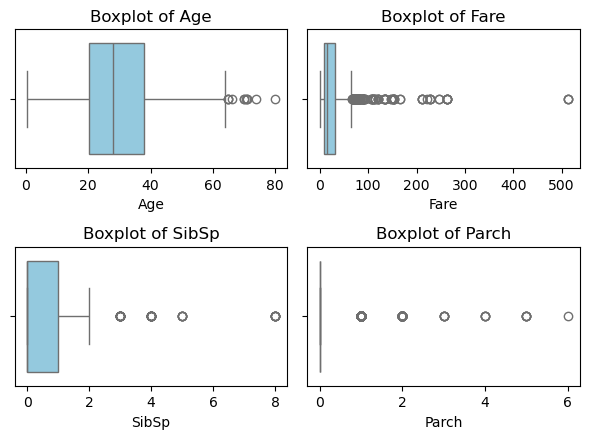

In [215]:
# numerical features:

# the outliers (in business sense / statistics sense)
# boxplot/ Z score method/ IQR method
plt.figure(figsize=(6, 4.5))
for i, col in enumerate(feature_types_v1["numerical"], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train_copy[col], color="skyblue")
    # sns.violinplot(x=train[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

`sns.histplot` with `kde=True` would plot data distribution of categorical features

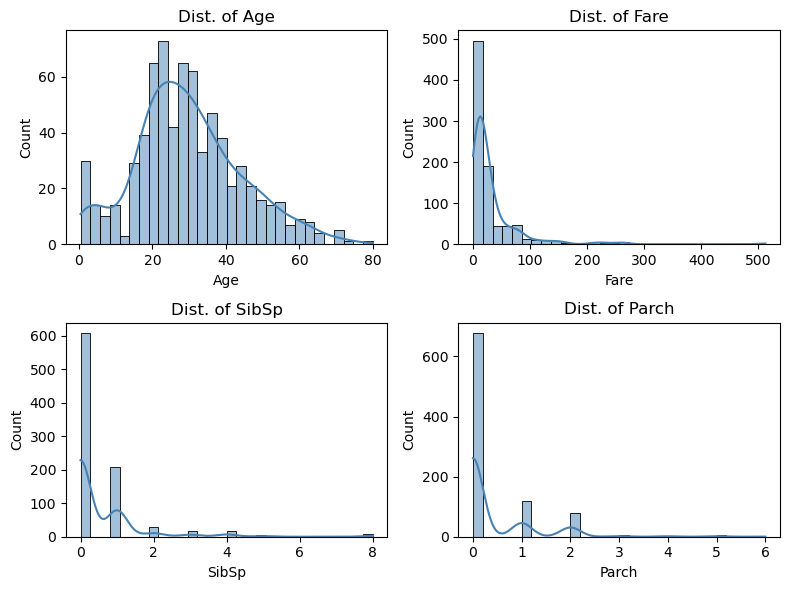

In [241]:
# plot kde of numeric values

plt.figure(figsize=(8, 6))

for i, col in enumerate(feature_types_v1['numerical'], 1):
    plt.subplot(2, 2, i) # this could be changed depending on the columns
    sns.histplot(train_copy[col], bins=30, kde=True, color="steelblue")
    plt.title(f"Dist. of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

While `sns.countplot()` could help identify outliers of categorical features, it also shows how they look like before feeling missing values

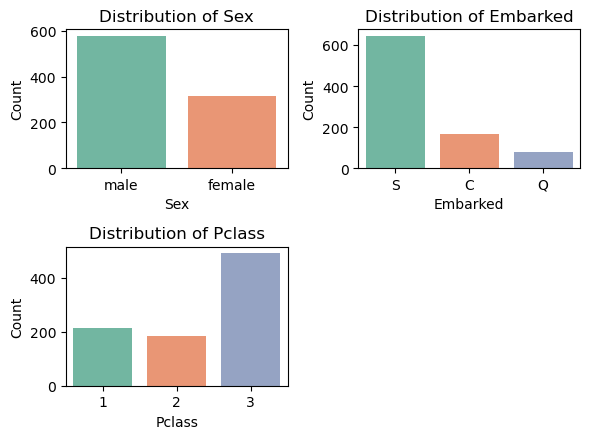

In [217]:
# categorical features:

plt.figure(figsize=(6, 4.5))

for i, col in enumerate(feature_types_v1["categorical"], 1):
    plt.subplot(2, 2, i) 
    sns.countplot(x=col, data=train_copy, hue=col, palette="Set2", legend=False)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

**Notes:**

- There is no serious data quality issue and outliers to deal with

## 2.2 Missing Value Analysis
### 2.2.1 Missing Value Identification
- `Table`: Missing_df calculation
- `Visualization`: Missing value heatmap plot (using sns.heatmap(train.isnull(), , ))

        Feature  MissingCount MissingRate
10        Cabin           687       77.1%
5           Age           177      19.87%
11     Embarked             2       0.22%
0   PassengerId             0        0.0%
1      Survived             0        0.0%
2        Pclass             0        0.0%
3          Name             0        0.0%
4           Sex             0        0.0%
6         SibSp             0        0.0%
7         Parch             0        0.0%
8        Ticket             0        0.0%
9          Fare             0        0.0%


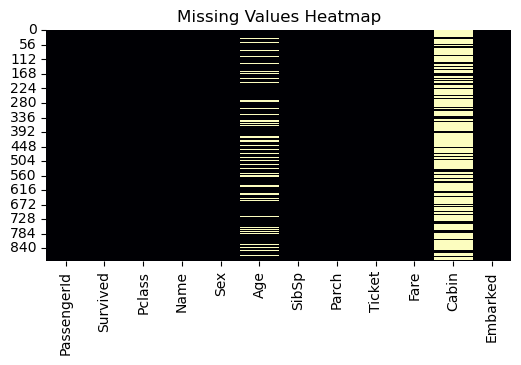

In [219]:
missing_df = train.isnull().sum().reset_index()
missing_df.columns = ["Feature", "MissingCount"]
missing_df["MissingRate"] = round(missing_df["MissingCount"] / len(train) * 100, 2).astype(str) + "%"
print(missing_df.sort_values(by = "MissingCount", ascending = False))

plt.figure(figsize=(6,3))
sns.heatmap(train.isnull(), cbar=False, cmap="magma")
plt.title("Missing Values Heatmap")
plt.show()

### 2.2.2 Missing Value Handling
**Notes:**
- `Cabin`, `Age`, `Embarked` are the missing columns
  - for `Cabin` we have 77.1% missing values. Either we discard the whole column, or missing indicators
  - for `Age` we could do either median or mean filling
    - mean/median/constant (and for time series is another story)
  - for `Embarked` we could use mode
    - categorical feature: mode/ missing indicator/ use other models to predict
- Sometimes we also delete the whole rows that contain to many missing values

**Future Work:**
- `Age` filling could have other strategy, since it has about 20% missing values

In [229]:
# for those features with many missing values should be preliminary addressed here/ in the future maybe loop

# Age
# train['Age'].fillna(train['Age'].mean(), inplace = False)
train['Age'] = train['Age'].fillna(train['Age'].median())

# Embarked
train['Embarked'] = train['Embarked'].fillna(train['Age'].mode()[0])

# Cabin
train["Cabin_missing_indicator"] = train["Cabin"].isnull().astype(int)
train["Cabin_missing_flag"] = train["Cabin_missing_indicator"].replace({0: "present", 1: "missing"})

In [231]:
# after filling the missing values and solve data quality problem, we would have new feature types
# In this problem "Cabin_missing_indicator"

feature_types_v2 = {
    "numerical": ["Age", "Fare", "SibSp", "Parch"],
    "categorical": ["Sex", "Embarked", "Pclass", "Cabin_missing_flag"], # replacing Cabin 
    "string": ["PassengerId", "Name", "Ticket"]
}
# in the future

# num: family_size, is_alone
# cat: Cabin_missing_flag

### 2.3 Encoding Categorical Features

- `Sex`, `Embarked`, `PClass`, `Cabin_missing_indicator`
  - for `Sex` and `Cabin_missing_indicator`, we need to transform the string into boolean
  - for `Embarked`, nothing special
  - for `Pclass`, it is an Ordinal feature, we could other do OneHotEncoder or leave it unchanged
  - we need to do one-hot encoding for all, either by sklearn OneHotEncoder, or by pd.get_dummies.
- For categorical features, there are not many options to transform (so just do one-time transformation and one version)
  1. changing strings into num is nearly a must
  2. merge classes when there are many
  3. one-hot encoding (dummy encoding that drop first col), embedding encoding (like for nlp)
  4. what else left to be learnt

In [ ]:
enc = OneHotEncoder(sparse_output = False, drop = 'first')
train = enc.fit_transform(train[["Embarked","Pclass"]]) # '1', '2'

## 3. Feature Engineering
### 3.1 Single Features
- `numerical`: hist/ kde
- `categorical`: hist
  - Original categorized data
  - numeric -> category
  - grouped category (after this could be determined)
  - many missing values make numeric -> category (preliminary addressed here)
- also determine the color scheme
  - C0 light blue not survived; C1 light red survived

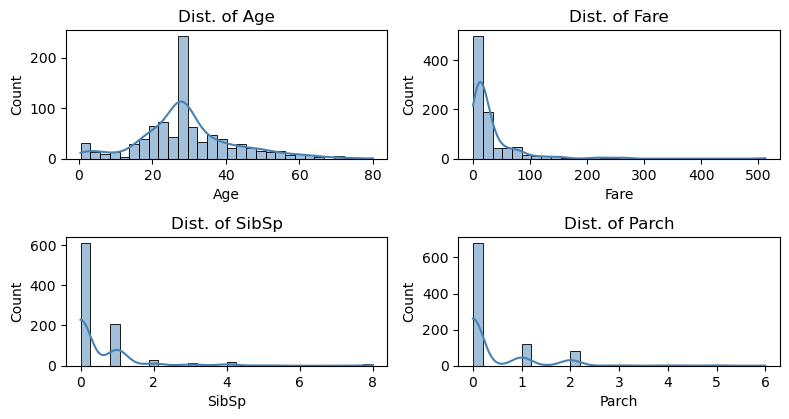

In [247]:
# plot kde of numeric values

plt.figure(figsize=(8, 8))

for i, col in enumerate(feature_types_v2['numerical'], 1):
    plt.subplot(len(feature_types_v2['numerical']), 2, i) # this could be changed depending on the columns
    sns.histplot(train[col], bins=30, kde=True, color="steelblue")
    plt.title(f"Dist. of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

**Notes:**

- It seems simply filling the blank of age has some obvious problem (by suddenly extending the median count too much)

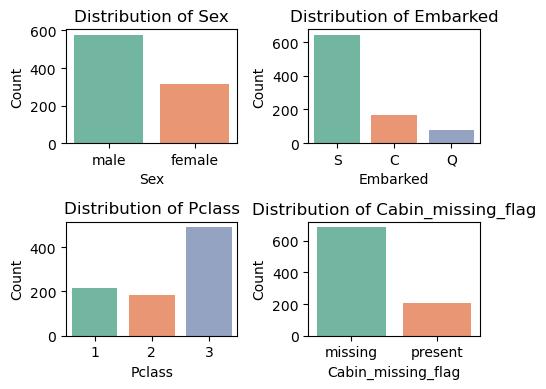

In [295]:
# plot bar charts of categorical values
plt.figure(figsize=(5, 4))

for i, col in enumerate(feature_types_v2['categorical'], 1):
    plt.subplot(2, 2, i) 
    sns.countplot(x=col, data=train, hue=col, palette="Set2", legend=False)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    #plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

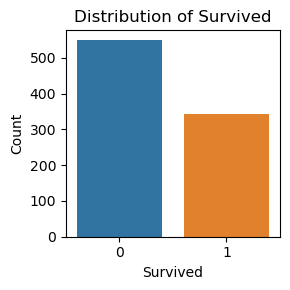

In [307]:
# plot for targets

plt.figure(figsize=(3, 3))

sns.countplot(x="Survived", data=train, hue="Survived", palette=["C0", "C1"], legend=False)
plt.title(f"Distribution of Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
#plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

**Notes:**
- `Age` is normal distribution
- `Fare` has a heavt tail, indicating a standardardlization
- `SibSp` and `Parch` are both not good distributed in this data, we are naturally considering a `family_size` or `is_alone` and see how it is visualized.
- for the categorical features and target, they look a little biased

In [315]:
# new features

# Simple SibSp and Parch seem not to work well
train["family_size"] = train["SibSp"] + train["Parch"] + 1
train["is_alone"] = np.where(train["family_size"] == 1, 1, 0)
# 'Fare' has a heavy tail, that's why we do the log transformation to make it 'normal distribution' (seems not make much sense just for trial)
train['Fare_log'] = np.log1p(train["Fare"])

# Add family_size, is_alone

feature_types_v2_add = {
    "numerical": ["family_size", "Fare_log"],
    "categorical": ["is_alone"]
}

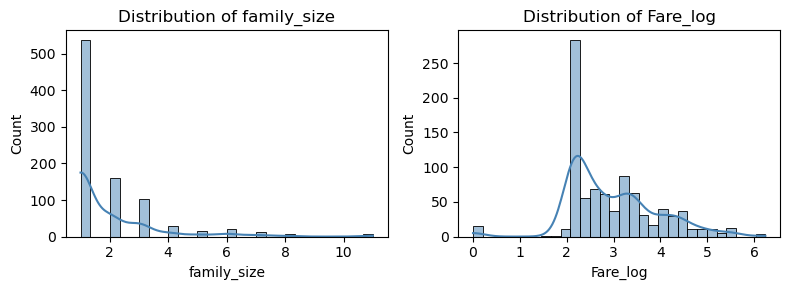

In [319]:
# new numerical features
plt.figure(figsize=(8, 3))

for i, col in enumerate(feature_types_v2_add["numerical"], 1):
    plt.subplot(1, 2, i) # this could be changed depending on the columns
    sns.histplot(train[col], bins=30, kde=True, color="steelblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

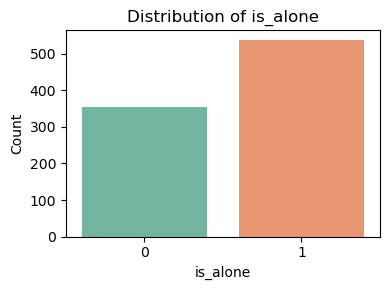

In [178]:
# new categorical features
plt.figure(figsize=(4, 3))

for i, col in enumerate(feature_types_v2_add["categorical"], 1):
    plt.subplot(1, 1, i) 
    sns.countplot(x=col, data=train, hue=col, palette="Set2", legend=False)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### 3.2 Single Num features -> Cat Label
In this part we are checking whether a feature is important to the label, and how could it be transformed. Should we adpot it or discard it.
- num -> cat
  - boxplot / kde / violinplot (boxplot + kde)
  - we have Basis func options
    - power functions: x, x^2...
      - when not necessary, don't use $ x ^ {1.5} $, $ x ^ {0.5} $
    - log(x), exp(x)
    - sin(x), cos(x) could be applied together when doing periodic data
    - nonlinear activation
    - Indicator Functions (binning)

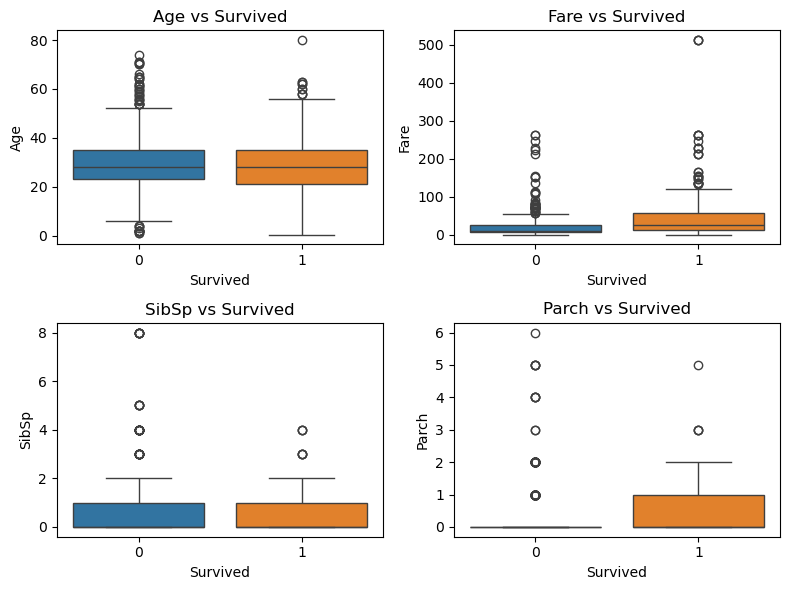

In [273]:
# violinplot and boxplot are very similar

plt.figure(figsize=(8,6))
for i, col in enumerate(feature_types_v2["numerical"], 1):
    plt.subplot(2,2,i)
    # sns.violinplot(x="Survived", y=col, data=train, hue="Survived", palette="Set2", legend = False)
    sns.boxplot(x="Survived", y=col, data=train, hue = "Survived", palette=["C0", "C1"], legend = False)
    plt.title(f"{col} vs Survived")

plt.tight_layout()
plt.show()

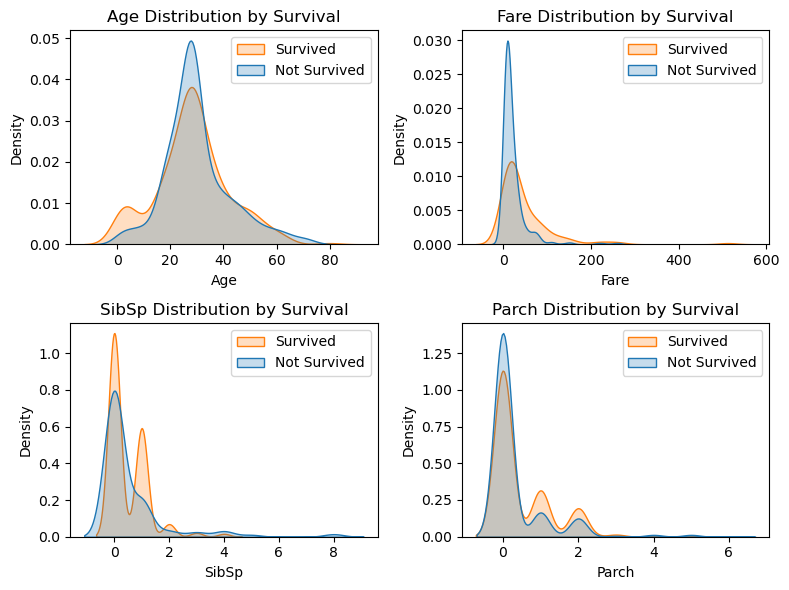

In [258]:
# sde curve has a better outlook
plt.figure(figsize=(8,6)) # 12, 8
for i, col in enumerate(feature_types_v2["numerical"], 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=train[train["Survived"]==1], x=col, label="Survived", fill=True, color="C1")
    sns.kdeplot(data=train[train["Survived"]==0], x=col, label="Not Survived", fill=True, color="C0")
    plt.title(f"{col} Distribution by Survival")
    plt.legend()
plt.tight_layout()
plt.show()

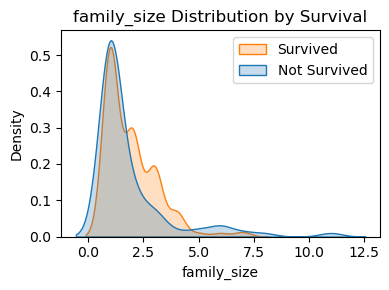

In [264]:
plt.figure(figsize=(4,3)) # 12, 8
for i, col in enumerate(feature_types_v2_add["numerical"], 1):
    plt.subplot(1, 1, i)
    sns.kdeplot(data=train[train["Survived"]==1], x=col, label="Survived", fill=True, color="C1")
    sns.kdeplot(data=train[train["Survived"]==0], x=col, label="Not Survived", fill=True, color="C0")
    plt.title(f"{col} Distribution by Survival")
    plt.legend()
plt.tight_layout()
plt.show()

**Notes:**
- `Fare` seems to have much influence, `Age` has less than assumed, `family_size` seems good

### 3.3 Single Cat features -> Cat Label
- stacked barchart
- we could merge different classes into like binary

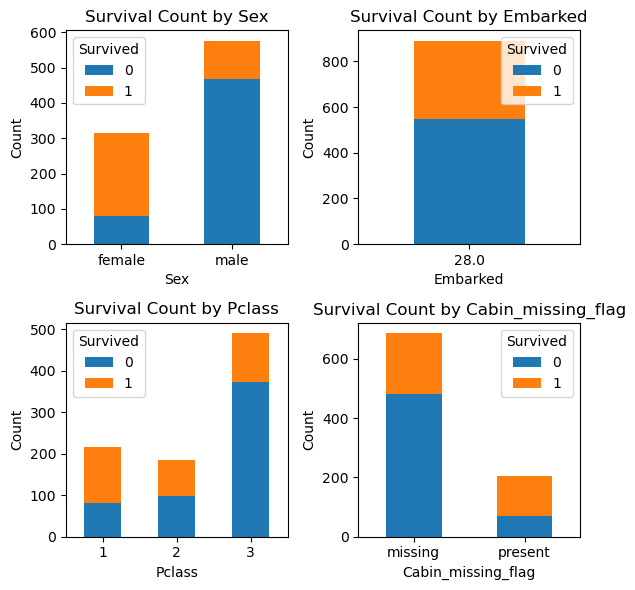

In [268]:
# cat vs cat

# A single barplot is not convincing, what if males are far less than females at the start?
'''
plt.figure(figsize=(12,8))
for i, col in enumerate(feature_types_v2["categorical"], 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=col, y="Survived", data=train, hue =col, palette="Set1", legend = False)
    plt.title(f"Survival Rate by {col}")
plt.show()
''';

# Stacked bar plot makes more sense
fig, axes = plt.subplots(2, 2, figsize=(6,6))

for i, col in enumerate(feature_types_v2["categorical"]):
    ax = axes[i//2, i%2]
    pd.crosstab(train[col], train["Survived"]).plot(
        kind="bar", stacked=True, ax=ax, color=["C0","C1"]
    )
    ax.set_title(f"Survival Count by {col}")
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# group barchart would also be useful in some case
'''
plt.figure(figsize=(7,7))
for i, col in enumerate(feature_types_v2["categorical"], 1):
    plt.subplot(2, 2, i) # can be all drawn or subplot
    # pd.crosstab(train[col], train["Survived"]).plot(kind="bar", stacked=True)
    sns.countplot(x=col, hue="Survived", data=train)

    plt.title(f"Survival Count by {col}")
    plt.ylabel("Count")
plt.tight_layout()
plt.show()
''';

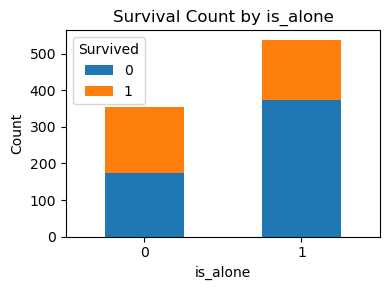

In [300]:
# Stacked bar plot makes more sense
fig, axes = plt.subplots(1, 1, figsize=(4, 3))

for i, col in enumerate(feature_types_v2_add["categorical"]):
    ax = axes # ax = axes[i//2, i%2]
    pd.crosstab(train[col], train["Survived"]).plot(
        kind="bar", stacked=True, ax=ax, color=["C0","C1"]
    )
    ax.set_title(f"Survival Count by {col}")
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


### 3.4 Relationship among features

For dataset with many features, this part might be done before (to decide PCA or others)

### 3.5 Feature Selection

In [298]:
'''
# contingency table
pd.crosstab(train["Pclass"], train["Survived"], margins=True)

# pointplot maybe useful when ordinal category
sns.pointplot(x="Sex", y="Survived", data=train, ci=None)
plt.title("Survival Rate by Embarked")
plt.show()
''';

### 3.6 Relationship between features

- num vs num
  - df.corr(), sns.heatmap()
- num vs cat
  - cramer's V
- cat vs cat
  - Point-Biserial (special case from Pearson)

### 3.7 Combined features Impacting on Label

## 4.Inspiration for Modelling

Show your talent

# **Part III: Summary**

In this notebook, we perform an exploratory data analysis (EDA) of the Titanic Dataset.

The basic pipeline is: 

1. **Understand the structure of the dataset:**
    - Take a glance at the data points and features from .csv and original problem.
    - Find out the meaning, data types, value range of features.
    - Does it contain many features or several features?
    - Is it time-based histogram?
    - Any other special things?
2. **Data Cleaning & Integration & Wrangling:**
    - Dirty values
      - Identification
        - Duplicate rows? Unique primary key? Inconsistency (kg vs g)?
        - Numerical: outliers? unphysical?
        - Catogorical/ Boolean: Imbalanced features? Imbalanced Targets? Spell Error or exceed value range?
      - Handling(should we mark those which have been handled?)
        - Correct wrong (strings, units)
        - mark wrong as missing
    - Missing values
      - Identification
        - In which features do we have more missing values?
      - Handling
        - Filling by mean, mode, median
        - delete
3. **Data Visulization and Feature Engineering**
    - Features visualization and processing
      - to help decide whether and how we should transform the data.
      - numerical (sde)
        - heavy tailed -> log1p
      - categorical (barchart)
        - encoding
      - text / time
    - Label visulization
      - Do we have a balanced target?
    - Features vs Label visualization
      - The relevance (Features vs Features and Features vs Label)
        - features selection: t-test, coefficient
        - different visualization method
        - multi-features vs target
      - Features transformation
        - single feature transformation
          - binning
          - basis function transformation
        - Generate new features from existing features
          - combination of different features
    - Finally we could perform standardlization, normalization, Z-score, minmaxscale, boxcox

4. **Insights that will guide feature engineering and model building**
    - free playground showing your talent
    - maybe new problems raised

After the feature engineering experiments in this notebook, we could summarize a tool function features.py. So we could nearly do every try here and collect only the important ones on features.py

But we do need to follow a basic pipeline on make_features_v1.py v2.py ... First do the necessary parts, then we go to explorayory parts